In [1]:
import numpy as np
import pandas as pd
import loadData
import monteCarloClass
import time

In [2]:
data, dataName = loadData.loadData("mt_all.csv")



 Total trials before cleaning
: 2156
uniqueSensory: [1.2 0.1] 
 uniqueStandard: [0.5] 
 uniqueConflict: [-0.25, -0.17, -0.08, 0.0, 0.08, 0.17, 0.25]
total trials after cleaning: 2156


In [3]:
intensityVariable = "deltaDurS"
sensoryVar = "audNoise"
standardVar = "standardDur"
conflictVar = "conflictDur"
#s
visualStandardVar = "unbiasedVisualStandardDur"
visualTestVar = "unbiasedVisualTestDur"
audioStandardVar = "standardDur"
audioTestVar = "testDurS"
# Instantiate the Monte Carlo class
mc_fitter = monteCarloClass.OmerMonteCarlo(data)
print("Visual test duration range:", data["recordedDurVisualTest"].min(), "to", data["recordedDurVisualTest"].max())
print("t_min, t_max:", mc_fitter.t_min, mc_fitter.t_max)

Visual test duration range: 0.1072 to 1.0763
t_min, t_max: 0.1072 1.0763


# Fit data

In [4]:
# fit parameters
mc_fitter.nSimul = 1000
mc_fitter.optimizationMethod= "bads"  # Use BADS for optimization
mc_fitter.nStart = 1 # Number of random starts for optimization
mc_fitter.modelName = "lognorm"  # Set measurement distribution to Gaussian

# If not fitted load fitted parameters

In [9]:
# read back the saved file to verify

import os
import json
import loadResults
try:
    res=loadResults.loadFitResults(dataName, modelName="lognorm")
    print(f"Loaded saved fit results: {res}")
    mc_fitter.modelFit= res['fittedParams']
    mc_fitter.logLikelihood= res['logLikelihood']
    mc_fitter.aic= res['AIC']
    mc_fitter.bic= res['BIC']
    mc_fitter.nDataPoints= res['n_conditions']
except:
    print("No saved fit results found, proceeding to fit the model.")
    timeStart = time.time()
    print(f"\nFitting Causal Inference Model for {dataName} with {len(mc_fitter.groupedData)} unique conditions")
    fittedParams = mc_fitter.fitCausalInferenceMonteCarlo(mc_fitter.groupedData)
    print(f"\nFitted parameters for {dataName}: {fittedParams}")
    print(f"Time taken to fit: {time.time() - timeStart:.2f} seconds")
    mc_fitter.modelFit= fittedParams
    mc_fitter.logLikelihood= -mc_fitter.nLLMonteCarloCausal(fittedParams, mc_fitter.groupedData)    

Loaded saved fit results: {'participantID': 'mt', 'modelType': 'lognorm', 'fittedParams': [0.07506518840789797, 0.1902256220579147, 0.29656523346900937, 0.5739902086675168, 0.6456357574462891, 0.29656523346900937], 'AIC': 2216.8168393180904, 'BIC': 2240.1000372364947, 'logLikelihood': -1102.4084196590452, 'n_conditions': 358}


## Simulate data using fitted parameters

In [12]:
mc_fitter.simulatedData = mc_fitter.simulateMonteCarloData(mc_fitter.modelFit, mc_fitter.data, nSamples=100)
mc_fitter.simDataFit=mc_fitter.fitMultipleStartingPoints(mc_fitter.simulatedData,1)

"psychometric fit"
mc_fitter.dataFit= mc_fitter.fitMultipleStartingPoints(data,1)

# Plot the fits

Noise: 0.1, Conflict: -0.25, Lambda: 0.075, Sigma_a: 0.190, Sigma_v: 0.297, p_c: 0.574
Noise: 0.1, Conflict: -0.17, Lambda: 0.075, Sigma_a: 0.190, Sigma_v: 0.297, p_c: 0.574
Noise: 0.1, Conflict: -0.08, Lambda: 0.075, Sigma_a: 0.190, Sigma_v: 0.297, p_c: 0.574
Noise: 0.1, Conflict: 0.0, Lambda: 0.075, Sigma_a: 0.190, Sigma_v: 0.297, p_c: 0.574
Noise: 0.1, Conflict: 0.08, Lambda: 0.075, Sigma_a: 0.190, Sigma_v: 0.297, p_c: 0.574
Noise: 0.1, Conflict: 0.17, Lambda: 0.075, Sigma_a: 0.190, Sigma_v: 0.297, p_c: 0.574
Noise: 0.1, Conflict: 0.25, Lambda: 0.075, Sigma_a: 0.190, Sigma_v: 0.297, p_c: 0.574
Noise: 1.2, Conflict: -0.25, Lambda: 0.075, Sigma_a: 0.646, Sigma_v: 0.297, p_c: 0.574
Noise: 1.2, Conflict: -0.17, Lambda: 0.075, Sigma_a: 0.646, Sigma_v: 0.297, p_c: 0.574
Noise: 1.2, Conflict: -0.08, Lambda: 0.075, Sigma_a: 0.646, Sigma_v: 0.297, p_c: 0.574
Noise: 1.2, Conflict: 0.0, Lambda: 0.075, Sigma_a: 0.646, Sigma_v: 0.297, p_c: 0.574
Noise: 1.2, Conflict: 0.08, Lambda: 0.075, Sigma_a

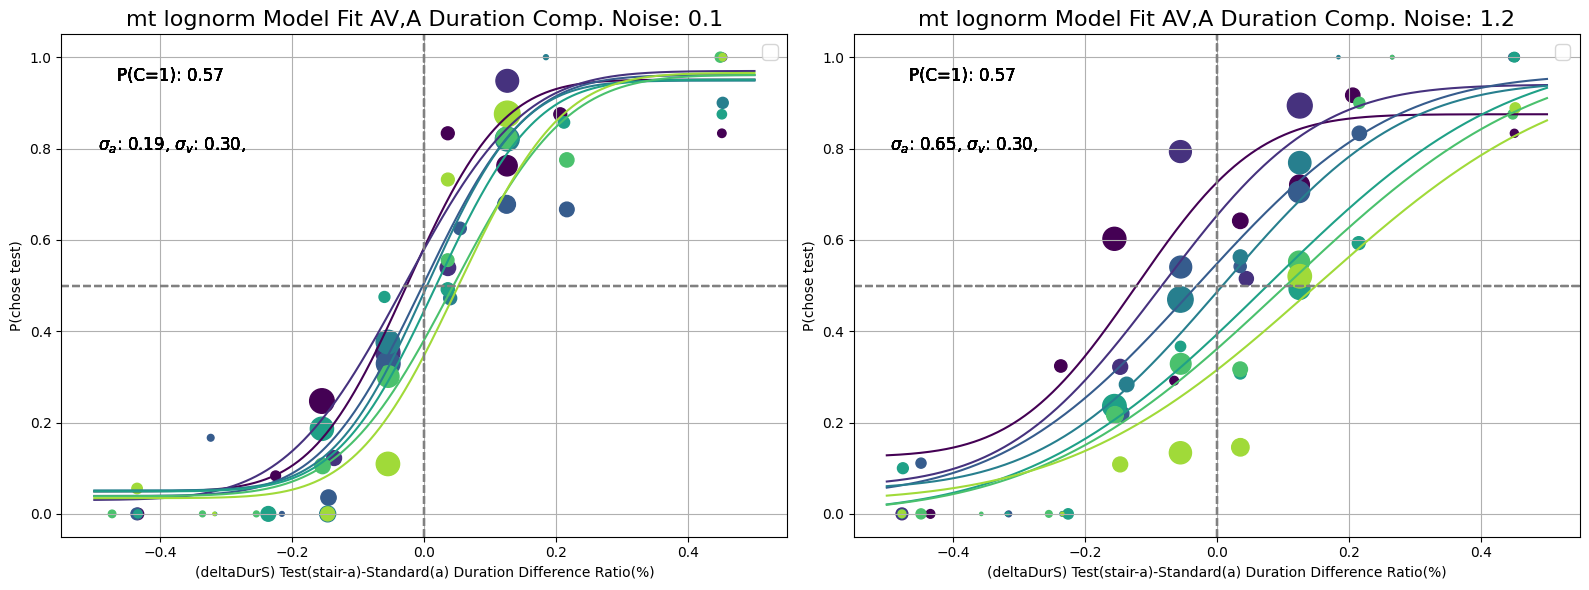

In [15]:
mc_fitter.dataName = dataName.split('_')[0]

mc_fitter.plotPsychometrics_MC_Data()

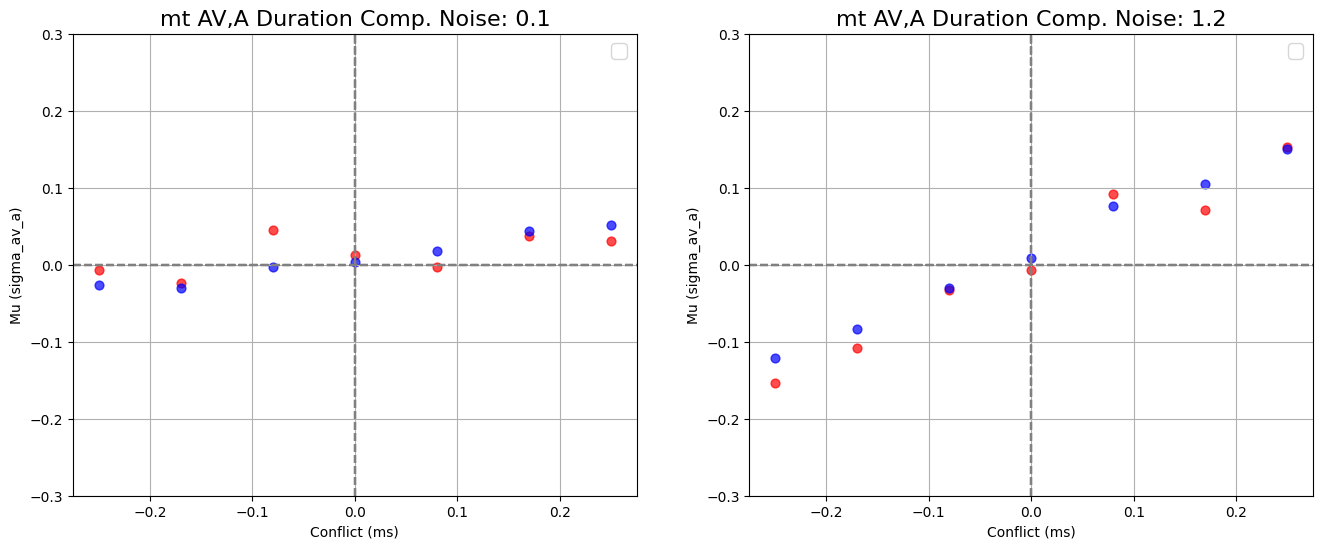

In [16]:
mc_fitter.plot_mu_vs_conflict_MC_vs_Data()

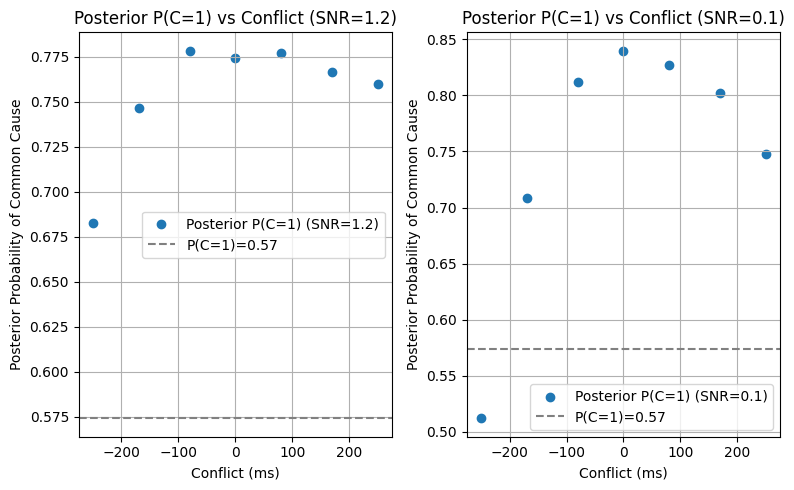

In [18]:
fittedParams = mc_fitter.modelFit
mc_fitter.plot_posterior_vs_conflict(mc_fitter.data, fittedParams)